### Bimodal Pay 

This workbook compares the emergence of bimodal starting salaries in bachelors and masters degrees associated with data science. 

The bimodal pay pattern is well established in Law, where graduates of elite (top 10-15) schools often recieve starting salaries as much as three times the median for graduates from lower ranked JD programs[1] 

Historically, STEM fields have seen a more continous distribition than law, with a narrow gap in starting salaries between elite and lower ranked programs [2]. However, rapid salary growth in top tech firms may be introcing a bimodal pay structure for recent STEM graduates. This workbook investigates the possibility that this bimodal pay pattern is emerging in Data Science positions as well.

Data science is a trickier field to track than law, as there is no degree requirement equivalent to the JD. However, a quick scan of data science jobs often shows a requirement for a BA/BS, with a preference for an MS degree or higher, in Math, Statistics, Computer Science, or Operations Research, or Engineering. Other surveys confirm that most data scientists hold a masters or doctoral degree (around 75%). [3]

This workbook generates a histogram for degrees in Applied Mathematics, Computer Science, and Statistics at the undergradate and masters degree level [4] (degree levels are considered separately). For comparison purposes, the workbook also generates a histogram for Law (JD) graduates and masters level graduates in English Literature.

The Data Science related degrees do show a notable bimodal pay pattern at both the BS and MS level. It is stronger at the MS level, though not so pronounced as in law. By contrast, staarting pay for MS graduates in English Literature appear normally distributed.

A few things to keep in mind.

Many programs don't report data for MS and PhD level graduates. I believe this is due to privacy concerns and the difficulty of anonymizing data when a graduating cohort is very small. I don't know if the missing data is evenly distributed across the various pay ranges, so there is a chance that the appearance of a bimodal pattern could result from uneven or missing data. For example, if programs with very high or very low salaries are tend to have larger graduating classes and are more likely to report than instututions with middle range salaries, it is possible. I don't have any evidence this is the case, but I can't rule it out. 

Some degree programs that often feed into data science, like Operations Research, don't have enough programs reporting data. For example, Berkeley (where I recieved my MS in Industrial Engineering/Operations Research), did not report salaries, while the Berkeley law school did report numbers. 

Law schools also tend to have much larger cohorts than STEM departments. Because the college scorecard does not report salary information for very small graduating cohorts (for privacy reasons), more MS programs are left out of the analysis than JD programs. 

Unlike law, which is almost uniformly a 3-year JD, STEM degrees are awarded at bachelors, masters, and doctoral levels, and many practitioners do not find the lack of a graduate degree to be an obstacle to career advancement. Cohort sizes in STEM are much higher when you consider all degree levels (or just bachelors recipients). However, I consider different degree levels separately, as the inclusion of diffrent degree levels could amplify or create its own bimodal effect. 

Bimodal pay can caused by different factors in different fields. A bimodal pay gap might repreasent different salaries for graduates holding similar job titles in similar industries, or it could very reflect different paths. For example, a bimodal pay pattern in mathematics might reflect graduates who enter teaching vs finance or tech. Or, in law, it could reflect differences in pay between private law firms and public service or government roles, rather than differences in pay between private firms. Because data is reported as a median for each cohort, it's difficult to know if this is happpening within a particular program.  

[1] (https://www.nalp.org/salarydistrib 

[2] citation needed

[3] https://www.kaggle.com/kaggle-survey-2020

[4] Note - You might reasonably ask why I left out engineering. I don't have a great answer for this. Engineering is a vast broad field, and a high percentage of graduates don't work as data scientists, but this is certainly true for the other fields I mentioned. It might make sense to include Engineering, though I'd need to break it down into sub-branches of engineering (it wouldn't make sense to combine civil engineering and computer engineering into the same dataset). For now, I will emphasize (the possible cop-out) that I am looking into bimodal pay in degrees associated with data science, not bimodal pay in data science itself.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt

### Calculation Pipeline

I create a histogram with 10,000 salary intervals for each data science related degree (applied math, computer science, statistics, operations research)

1. Query the median 1st year salary for each program cohort based on degree level and program
2. Round the results to the nearest 10,000 
3. Chart the total number of graduates at each 10,000 interval in a histogram.  

### Query and Graph (Histogram) Pay Ranges

Note - because of small differences in spelling and naming conventions, I use a "LIKE" query to pattern match on the presence of a term within the descriptor for a program.

In this case, a "LIKE" query for '%Math%' will bring in Applied Mathematics, Computational Mathematics, and so forth. This does run certain risks - grouping "Applied Mathematics" and "Mathematics" could introduce a bimodal pattern that reflects differences between two distinct degree groups, rather than within a group. 

There is also a possibility that the binning thresholds could create an illusion of a histogram spike, especially for smaller datasets. I don't think this is happening, since the 10,0000 interval is relatively small compared to the overall range, but if you're concerned about this, it might make sense to varying the binning sizes. 

In [2]:
# query the institution, median 1st year salary, and cohort size
# ignore results where no 1st year salary information is available
# round the salary range to nearest 10,0000

def query_pay_ranges(degree, level):
    df_dsi = pysqldf("""
    SELECT 
        INSTNM, CIPDESC, 
        EARN_MDN_HI_1YR * 1 as MED,
        EARN_COUNT_WNE_HI_1YR * 1 AS CSIZE
    FROM 
        df 
    WHERE
        CIPDESC LIKE '%""" + degree + """%' 
    AND 
        CREDLEV = """ + str(level) + """
    AND
        EARN_MDN_HI_1YR <> 'PrivacySuppressed'
    ORDER BY 
        MED DESC
    """)

    df_dsi['MED_RANGE'] = round(df_dsi['MED'], -4)
    
    return df_dsi

In [3]:
# find the number of graduates at each 10,000 interval
# aand plot as a histogram

def graph_pay_ranges(df_plot, legend):

    df_plot = df_plot.groupby("MED_RANGE")['CSIZE'].agg('sum').to_frame()
    df_plot = df_plot.rename(columns={"CSIZE": legend})
    
    
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.style.use('ggplot')
    df_plot.plot(kind='bar')
    plt.xticks(rotation=90)
    plt.ylabel('Graduates')

In [4]:
df = pd.read_csv('data/Most-Recent-Cohorts-Field-of-Study.csv')

### Applied Math

In [5]:
df_applied_math = query_pay_ranges('Applied Mathematics', 5)

In [6]:
# take a look at the first few results to see the structure. 
df_applied_math.head()

,INSTNM,CIPDESC,MED,CSIZE,MED_RANGE
0,New York University,Applied Mathematics.,122038,18,120000
1,University of California-Los Angeles,Applied Mathematics.,117572,16,120000
2,Johns Hopkins University,Applied Mathematics.,112923,16,110000
3,University of Chicago,Applied Mathematics.,108331,31,110000
4,Colorado State University-Fort Collins,Applied Mathematics.,99683,16,100000


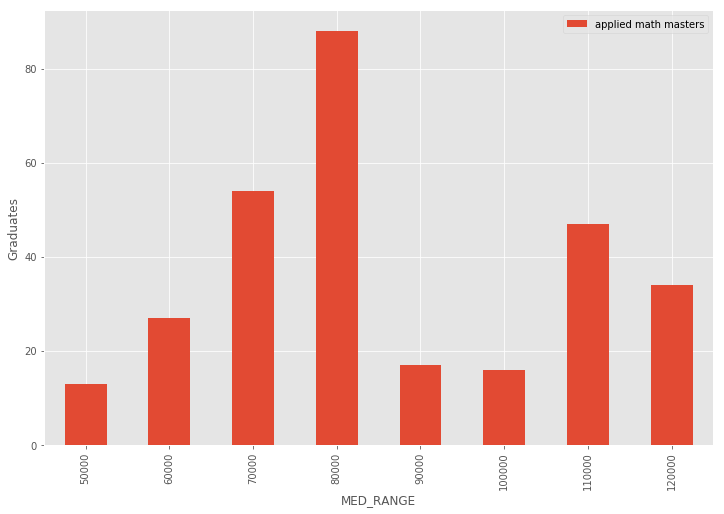

In [7]:
graph_pay_ranges(df_applied_math, 'applied math masters')

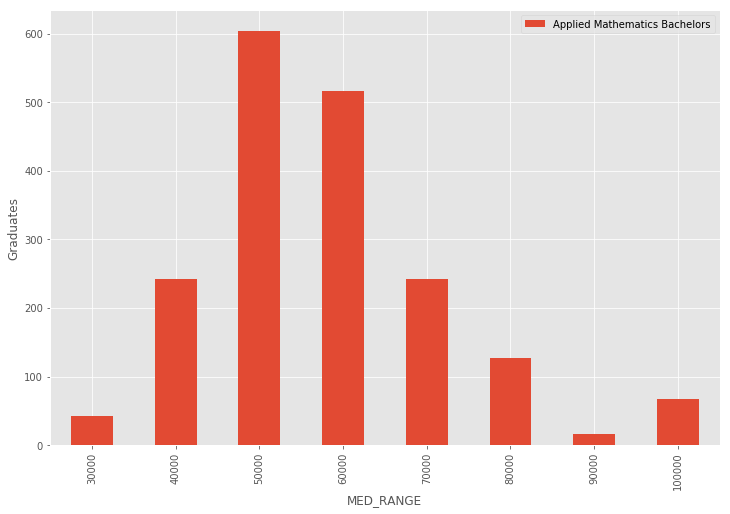

In [8]:
df_applied_math_b = query_pay_ranges('Applied Mathematics', 3)
graph_pay_ranges(df_applied_math_b, 'Applied Mathematics Bachelors')

### Statistics

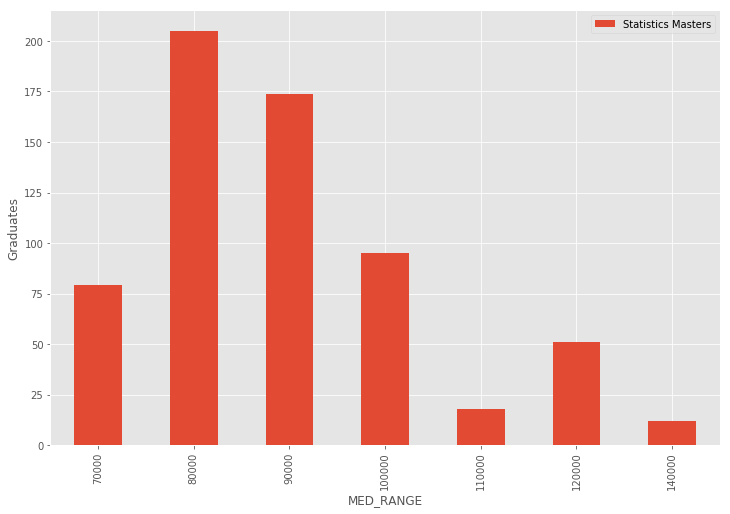

In [9]:
df_stats = query_pay_ranges('Statistics', 5)
graph_pay_ranges(df_stats, 'Statistics Masters')

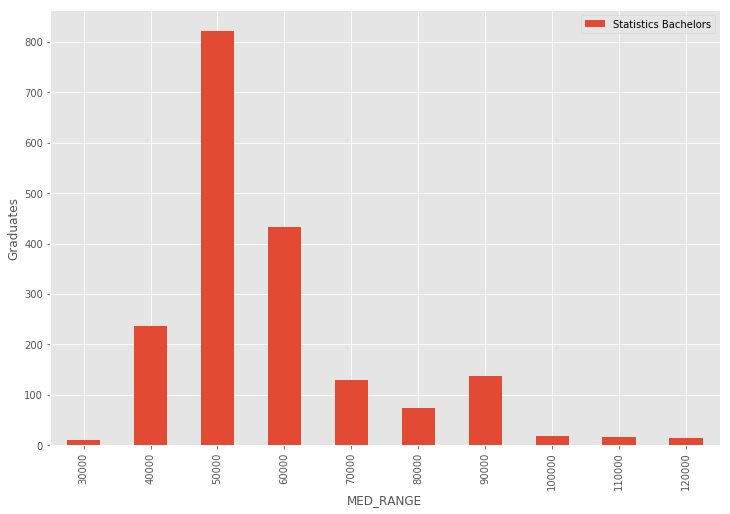

In [10]:
df_stats_b = query_pay_ranges('Statistics', 3)
graph_pay_ranges(df_stats_b, 'Statistics Bachelors')

### Computer Science

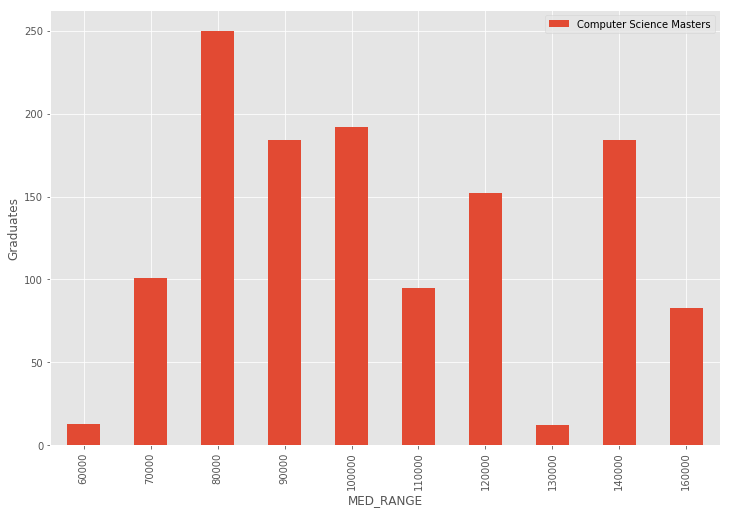

In [11]:
df_cs = query_pay_ranges('Computer Science', 5)
graph_pay_ranges(df_cs, 'Computer Science Masters')

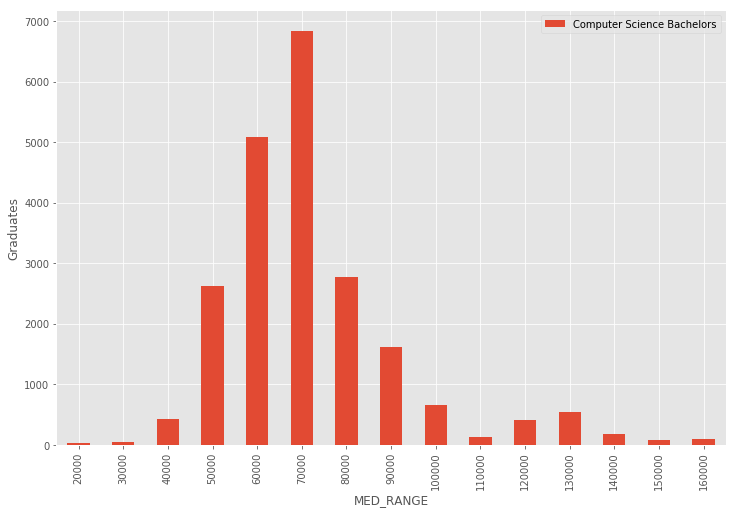

In [12]:
df_cs_bach = query_pay_ranges('Computer Science', 3)
graph_pay_ranges(df_cs_bach, 'Computer Science Bachelors')

### Operations Research

In [21]:
# commenting this out, there really isn't enough data
#df_cs_bach = query_pay_ranges('Operations Research', 5)
#graph_pay_ranges(df_cs_bach, 'Operations Research Masters')

In [22]:
#df_cs_bach = query_pay_ranges('Operations Research', 3)
#graph_pay_ranges(df_cs_bach, 'Operations Research Masters Bachelors')

### Engineering

I left out engineering for reasons explained above (summarized here as: there really isn't a compelling reason to leave it out, but make sure you break it down into specific branches of engineering since there are very diffrent pay patterns in diffrerent branches).

### Law

For comparison, let's take a look at a field with a well-established bi-modal pay distribution

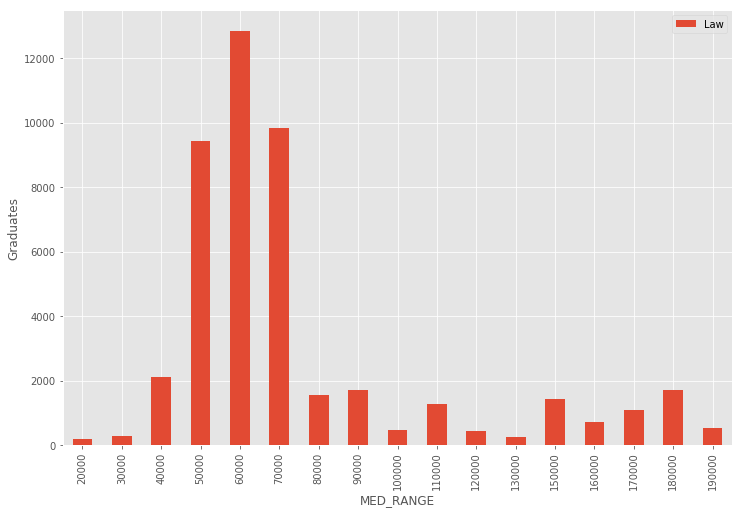

In [13]:
df_law = query_pay_ranges('Law', 7)
graph_pay_ranges(df_law, 'Law')

In [14]:
df_law.head(100)

,INSTNM,CIPDESC,MED,CSIZE,MED_RANGE
0,Columbia University in the City of New York,Law.,185760,518,190000
1,University of Pennsylvania,Law.,179672,396,180000
2,New York University,Law.,177207,589,180000
3,Northwestern University,Law.,176087,317,180000
4,University of Virginia-Main Campus,Law.,175653,412,180000
5,University of Chicago,Law.,173847,285,170000
6,Harvard University,Law.,172423,797,170000
7,Stanford University,Law.,163869,247,160000
8,University of California-Berkeley,Law.,160316,457,160000
9,Georgetown University,Law.,145898,918,150000


### Other distributions

Not all masters degrees follow the binary distribution - Literature, for example, appears normally distributed. 

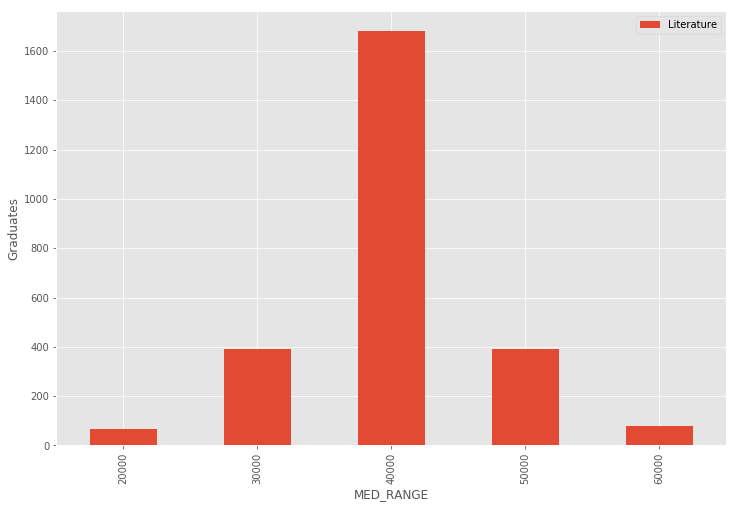

In [16]:
df_lit = query_pay_ranges('Literature', 5)
graph_pay_ranges(df_lit, 'Literature')